In [1]:
%matplotlib inline

# Comparison of Sparse To Dense with Dense To Sparse

In [2]:
from ndreg import *

First we read our images. This one is a sparse image

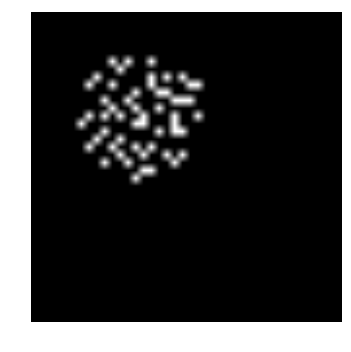

In [3]:
sparseImg = imgRead("../dat/sparse/sparse.img")
imgShow(sparseImg)

This image is a dense image

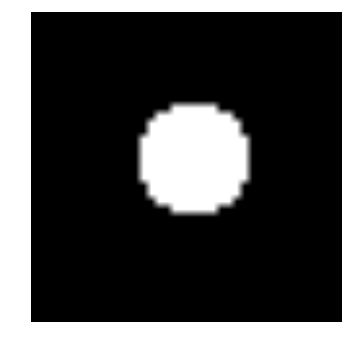

In [4]:
denseImg = imgRead("../dat/sparse/dense.img")
imgShow(denseImg)

Here's a checkerboard of the 2 images before registration

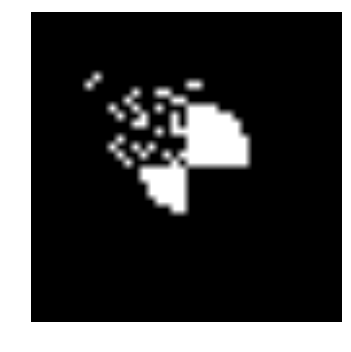

In [5]:
imgShow(imgChecker(sparseImg, denseImg, useHM=False))

## Sparse to Dense Registration
Now we register the sparse image to the dense image

	E, E_velocity, E_rate, E_image (E_image %), LearningRate
0.	3743.06, 0.251222, 0, 3742.81 (95.9326%), 6.875000e-05
1.	2740.27, 0.101393, 0, 2740.16 (70.2336%), 7.562500e-05
2.	2273.17, 0.0413963, 0, 2273.13 (58.2631%), 2.079688e-05
3.	2244.74, 0.0708885, 0, 2244.66 (57.5334%), 1.143828e-05
4.	2205.27, 0.0679281, 0, 2205.21 (56.522%), 3.145527e-06
5.	2205.13, 0.0676721, 0, 2205.06 (56.5182%), 4.325100e-07
E = 2205.13 (56.5182%)
Length = 0.593741
Time = 2.34958s (0.0391597m)


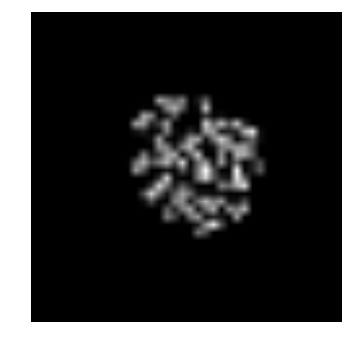

In [6]:
alpha=0.1
epsilon = None
(field, invField) = imgMetamorphosis(sparseImg, denseImg, alpha=alpha, epsilon=epsilon, verbose=True)
outImg = imgApplyField(sparseImg, field)
imgShow(outImg)

We validate the registration using a checkerboard of the deformed sparse image and dense image

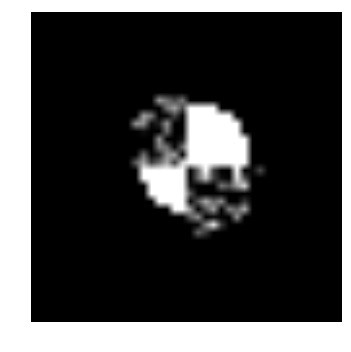

In [7]:
imgShow(imgChecker(outImg, denseImg))

## Dense to sparse Registration
Next we register the dense image to the sparse image

	E, E_velocity, E_rate, E_image (E_image %), LearningRate
0.	1858.45, 0.151255, 0, 1858.3 (47.6304%), 3.437500e-05
1.	1532.18, 0.171234, 0, 1532.01 (39.2672%), 3.781250e-05
2.	1393.81, 0.253481, 0, 1393.56 (35.7184%), 4.159375e-05
3.	1345.79, 0.284682, 0, 1345.5 (34.4868%), 2.287656e-05
4.	1283.53, 0.294813, 0, 1283.23 (32.8907%), 2.516422e-05
5.	1282.22, 0.309006, 0, 1281.92 (32.857%), 2.768064e-05
6.	1264.07, 0.345595, 0, 1263.72 (32.3907%), 3.044870e-05
7.	1239.12, 0.368271, 0, 1238.75 (31.7507%), 3.349358e-05
8.	1223.37, 0.393987, 0, 1222.97 (31.3463%), 3.684293e-05
9.	1185.87, 0.415099, 0, 1185.45 (30.3845%), 4.052723e-05
10.	1183.19, 0.43177, 0, 1182.75 (30.3154%), 2.228997e-05
E = 1183.19 (30.3154%)
Length = 0.570418
Time = 2.95058s (0.0491763m)


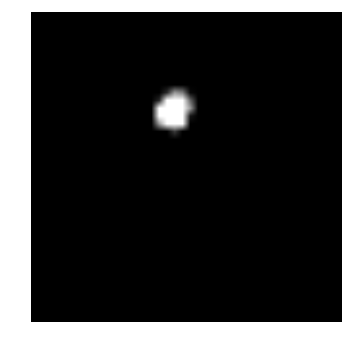

In [8]:
(field, invField) = imgMetamorphosis(denseImg, sparseImg, alpha=alpha, verbose=True)
outImg = imgApplyField(denseImg, field)
imgShow(outImg)

We validate the registration using a checkerboard of the dense image and sparse image

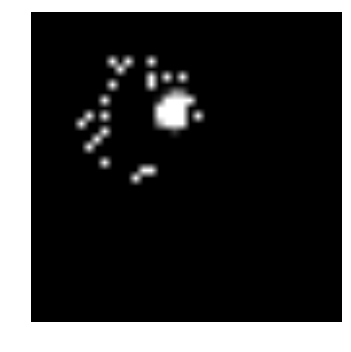

In [9]:
imgShow(imgChecker(outImg, sparseImg, useHM=False))